# 과제

### Problem 1

어떤 행렬이 singular matrix인지 확인하는 함수를 작성하세요.

(* singular matrix : 역행렬이 존재하지 않은 행렬)

- 매개변수 : 2차원 벡터(np.array)
- 반환값 : 인자로 주어진 벡터가 singular하면 True, non-singular하면 False를 반환

In [25]:
import numpy as np

# 내부 코드는 오로지 한 줄이어야 합니다.
# Hint: 역행렬의 존재 조건을 고민해보세요.

def p1(x):
    return True if np.linalg.det(x) == 0 else False

In [26]:
ex_1 = np.array([[1,4],[2,8]])
ex_2 = np.array([[2,3],[3,4]])

answer = (True, False)
your_work = (p1(ex_1), p1(ex_2))

print("your answer:", your_work)
print("correct" if answer is not None and answer == your_work else "wrong")

your answer: (True, False)
correct


### Problem 2

어떤 벡터가 주어졌을 때 L2 norm을 구하는 함수를 작성하세요.

- 매개변수 : 1차원 벡터 (np.array)
- 반환값 : 인자로 주어진 벡터의 L2 Norm값 (number)

In [74]:
import numpy as np

# 내부 코드는 두 줄이어야 합니다.

def p2(x):
    number = np.linalg.norm(x, 2)
    return number

In [78]:
ex_1 = np.array([[1,4,5],[2,8,3]])
ex_2 = np.array([[2,3],[3,4]])

answer = (10.560835223390939, 6.162277660168379)
your_work = (p2(ex_1), p2(ex_2))

print("your answer:", your_work)
print("correct" if answer is not None and answer == your_work else "wrong")

your answer: (10.560835223390939, 6.162277660168379)
correct


### Problem 3

1.
2011년부터 2020년까지의 평균 영화 러닝타임은 각각 103, 101, 99, 100, 100, 95, 95, 96, 93, 90입니다.

연도와 러닝타임을 각각 List로 만들고, 이 리스트들을 활용해 movie_df DataFrame을 만드세요.

In [45]:
import pandas as pd

# (1) 연도와 러닝타임 list 만들기
# 연도 리스트는 for문을 활용해 만드세요.(내부 코드는 오로지 한 줄이어야 합니다.)
p3_years = [i for i in range(2011, 2021)]
p3_durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# (2) 각 리스트의 같은 인덱스끼리 같은 열에 취급하는 DataFrame 만들기
# 코드는 오로지 한 줄이어야 합니다.
# Hint1: 지난 시간에 배운 generator를 활용해보세요.
# Hint2: 열 이름을 지정하기 위해 columns=["years", "durations"] 활용해보세요.
movie_df = pd.DataFrame(zip(p3_years, p3_durations), columns=["years", "durations"])
movie_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


2.
movie_df를 matploblib을 활용해 years와 durations의 관계를 나타내는 Line plot을 그리세요.

제목은 "Average Movie Durations 2011-2020"으로 설정하세요.

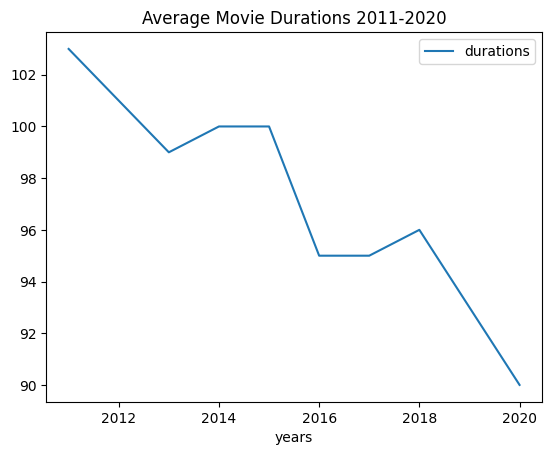

In [47]:
import matplotlib.pyplot as plt

# matplotlib을 활용해 years와 durations의 관계를 나타내는 line plot 그리기
# 코드는 오로지 한 줄이어야 합니다.
# Hint: fig에 객체에 그래프를 저장해보세요.

fig = movie_df.plot(x="years", y="durations", title="Average Movie Durations 2011-2020")

### Problem 4

1.
pandas 라이브러리를 활용해 <code>"datasets/netflix_data.csv"</code>을 불러 netflix_df에 DataFrame 형식으로 지정하고, 10번째 열까지 출력합니다.

In [48]:
import pandas as pd

# (1) pandas를 활용해 csv를 불러오기
# 코드는 오로지 한 줄이어야 합니다.
netflix_df = pd.read_csv("datasets/netflix_data.csv") 

# (2) netflix_df의 10번째 열까지 출력하기
# 코드는 오로지 한 줄이어야 합니다.
netflix_df[:10]

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,118,"When a doctor goes missing, his psychiatrist w...",Horror Movies
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,143,An architect and his wife move into a castle t...,Horror Movies


2.
netflix_df에서 'type' 중에 'Movie'가 아닌 데이터가 있음을 확인할 수 있습니다. 위 DataFrame에서 'type'이 'Movie'인 데이터만 필터링해 분석하려고 합니다. 

또한 다양한 정보가 모두 필요하지 않으니, 'title', 'genre', release_year', 'duration' 행만 포함된 새로운 DataFrame을 netfilx_movies_subset에 지정해보세요.

In [49]:
# (1) netflix_df에서 'type'이 'Movie'인 데이터만 필터링하기
# 코드는 오로지 한 줄이어야 합니다.
netflix_df_movies_only = netflix_df[netflix_df['type'] == 'Movie']

# (2) netflix_df_movies_only에서 'tile', 'genre', 'release_year', 'duration' 행만 인덱싱하기
# 코드는 오로지 한 줄이어야 합니다.
netflix_movies_subset = netflix_df_movies_only[['title', 'genre', 'release_year', 'duration']]
netflix_movies_subset[:10]

,title,genre,release_year,duration
1,7:19,Dramas,2016,93
2,23:59,Horror Movies,2011,78
3,9,Action,2009,80
4,21,Dramas,2008,123
6,122,Horror Movies,2019,95
7,187,Dramas,1997,119
8,706,Horror Movies,2019,118
9,1920,Horror Movies,2008,143
10,1922,Dramas,2017,103
13,"2,215",Documentaries,2018,89


3.
netfilx_movies_subset에는 다양한 'genre'를 가지고 있습니다. 위 DataFrame에서 주요 장르별로 colors list를 만들어, 추후에 보다 직관적으로 그래프를 작성하고자 합니다.

"Comedies"는 "red", "Dramas"는 "yellow", "Action"은 "blue", "Horror Movies"는 "green", 나머지는 "black"으로 구성되어 있는 list를 만드려고 합니다.

netfilx_movies_subset의 각각의 요소들을 순서대로 'genre'에 조건에 따라 색깔을 지정해줍니다.

In [67]:
colors = []

# (1) netflix_movies_subset에서 'genre'별로 색깔 지정하는 list 만들기
# Hint: DataFrame의 행을 반복할 때 사용하는 메서드를 활용하세요.

for idx, row in netflix_movies_subset.iterrows():
    if row['genre'] == "Comedies":
        colors.append("red")
    elif row['genre'] == "Dramas":
        colors.append("yellow")
    elif row['genre'] == "Action":
        colors.append("blue")
    elif row['genre'] == "Horror Movies":
        colors.append("green")
    else:
        colors.append("black")
        
colors[:10]

['yellow',
 'green',
 'blue',
 'yellow',
 'green',
 'yellow',
 'green',
 'green',
 'yellow',
 'black']

4.
netflix_movies_subset를 matploblib을 활용해 years와 durations의 관계를 나타내는 Scatter plot을 그리세요. 색깔은 3번에서 지정한 colors list를 활용하고, dot size는 10으로 지정하세요.

제목은 "Movie Durations by Release Year"로, xlabel은 "Release year"로, ylabel은 "Duration (min)"로 설정하세요.

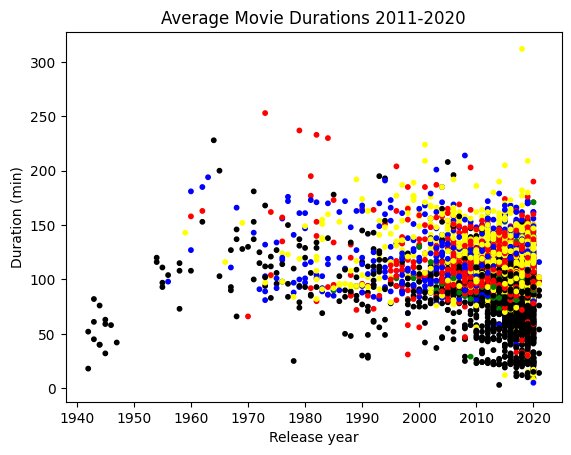

In [73]:
import matplotlib.pyplot as plt

# matplotlib을 활용해 release_year와 duration의 관계를 나타내는 scatter plot 그리기
# 색깔은 color list를 활용하고, size는 10, title은 "Movie Durations by Release Year, xlabel과  ylabel은 각각 "Duration (min)", "Release year"으로 설정하세요.
# 코드는 한 줄이어야 합니다.
# Hint: fig에 객체에 그래프를 저장해보세요.

fig = netflix_movies_subset.plot(kind="scatter", x="release_year", y="duration", title="Average Movie Durations 2011-2020", color=colors, s=10, xlabel="Release year", ylabel="Duration (min)")